# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('House_Rent_Dataset.csv', sep=None, engine='python')

df.shape

(4746, 12)

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [7]:
print('Перевіряємо наявність пропущених значень:\n', df.isnull().sum())

print('Перевіряємо відсоток пропущених значень:\n', (df.isnull().mean() * 100).round(2))

Перевіряємо наявність пропущених значень:
 Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64
Перевіряємо відсоток пропущених значень:
 Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64


In [9]:
stats = df[['BHK', 'Rent', 'Size', 'Bathroom']].describe()
stats.round(2)

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


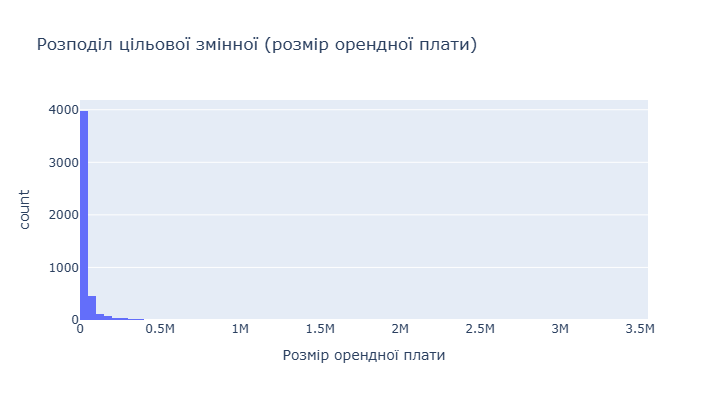

In [10]:
# Розподіл орендної плати
fig = px.histogram(
    df,
    x='Rent',
    nbins=100,
    title='Розподіл цільової змінної (розмір орендної плати)',
    labels={'Rent': 'Розмір орендної плати', 'count': 'Кількість житла'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

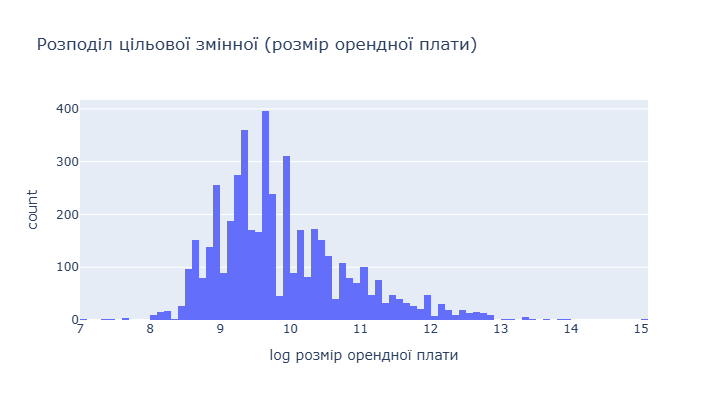

In [11]:
df['log_Rent'] = np.log1p(df['Rent'])
fig = px.histogram(
    df,
    x='log_Rent',
    nbins=100,
    title='Розподіл цільової змінної (розмір орендної плати)',
    labels={'log_Rent': 'log розмір орендної плати', 'count': 'Кількість житла'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

In [13]:
Q1 = df["Rent"].quantile(0.25)
Q3 = df["Rent"].quantile(0.75)
IQR = Q3 - Q1

# Межі
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фільтруємо дані без викидів
df_clean = df[(df["Rent"] >= lower_bound) & (df["Rent"] <= upper_bound)]

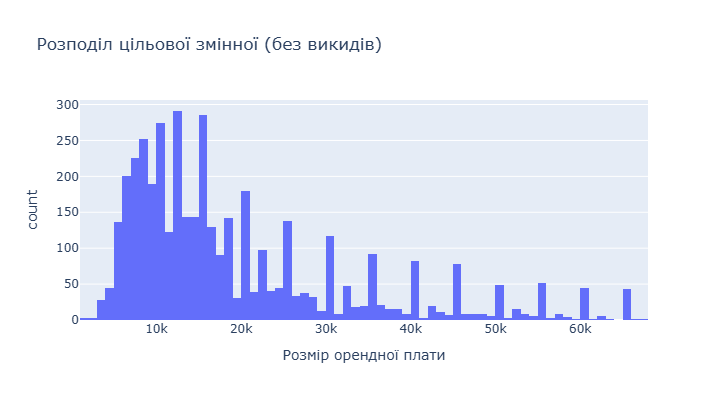

In [15]:
# Розподіл орендної плати (без викидів)
fig = px.histogram(
    df_clean,
    x='Rent',
    nbins=100,
    title='Розподіл цільової змінної (без викидів)',
    labels={'Rent': 'Розмір орендної плати', 'count': 'Кількість житла'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

In [18]:
df_clean[["City", "Area Type", "Furnishing Status", "Tenant Preferred", "Point of Contact"]].nunique()

City                 6
Area Type            3
Furnishing Status    3
Tenant Preferred     3
Point of Contact     3
dtype: int64


## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


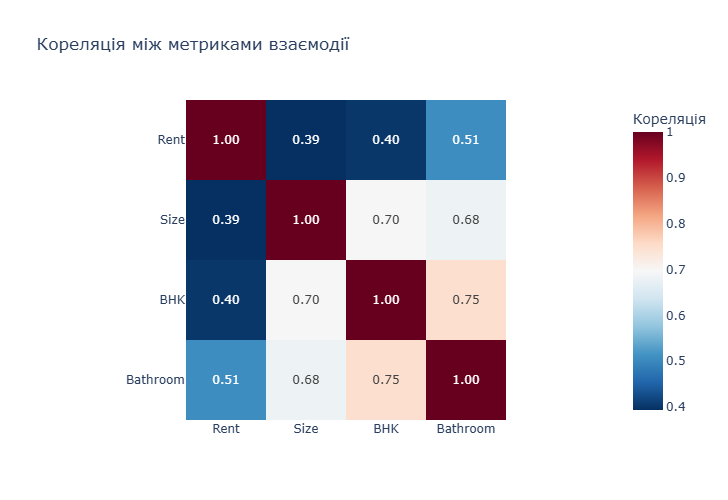

In [19]:
# Створюємо датафрейм тільки з числовими метриками
metrics_df = df_clean[['Rent', 'Size', 'BHK', 'Bathroom']].dropna()

# Матриця кореляцій
correlation_matrix = metrics_df.corr()

# Візуалізація кореляцій
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',
    color_continuous_scale='RdBu_r',
    title='Кореляція між метриками взаємодії',
    labels=dict(color="Кореляція")
)
fig.update_layout(height=500)
fig.show()

In [ ]:
Маємо помірну позитивну кореляцію між значенням орендної плати та кількість душових, площею житла, 
кількістю кімнат

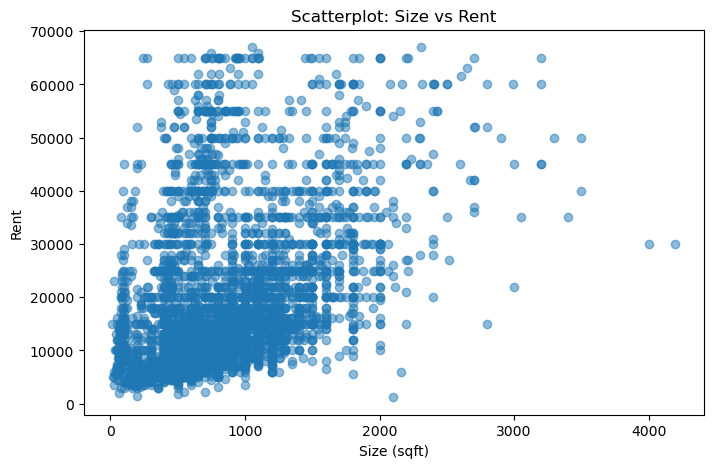

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean["Size"], df_clean["Rent"], alpha=0.5) 
plt.xlabel("Size (sqft)")
plt.ylabel("Rent")
plt.title("Scatterplot: Size vs Rent")
plt.show()

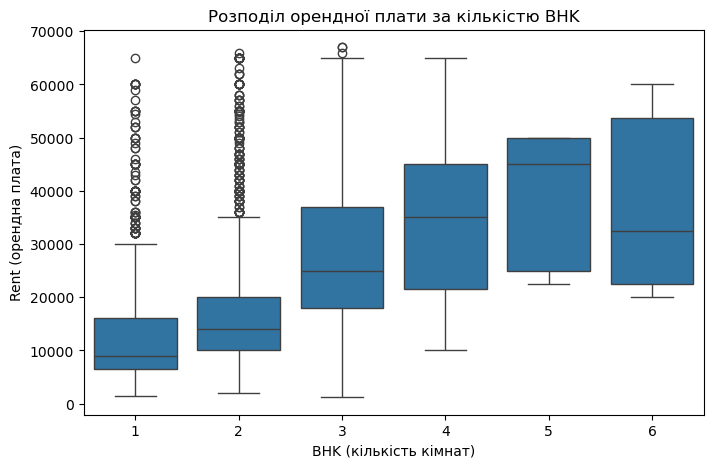

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x="BHK", y="Rent", data=df_clean)
plt.title("Розподіл орендної плати за кількістю BHK")
plt.xlabel("BHK (кількість кімнат)")
plt.ylabel("Rent (орендна плата)")
plt.show()

In [ ]:
Є чітка позитивна залежність, чим більше BHK тим вища орендна плата.
На ринку більших квартир ціна більш варіативна (може залежати від району, стану меблювання тощо).
Для 1–3 BHK є дуже багато викидів (наприклад, квартири з 1 кімнатою, але оренда 50–60k),
це може бути через елітні райони (наприклад, центр міста).

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [29]:
furnishing_dummies = pd.get_dummies(df_clean['Furnishing Status'], prefix='FurnishingStatus')

In [30]:
furnishing_dummies.head().astype(int)

,FurnishingStatus_Furnished,FurnishingStatus_Semi-Furnished,FurnishingStatus_Unfurnished
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [31]:
df_clean = pd.concat([df_clean, furnishing_dummies], axis=1)

In [32]:
df_clean.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,log_Rent,FurnishingStatus_Furnished,FurnishingStatus_Semi-Furnished,FurnishingStatus_Unfurnished
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,9.210440,False,False,True
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,9.903538,False,True,False
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,9.741027,False,True,False
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,9.210440,False,False,True
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,8.922792,False,False,True


In [42]:
area_type_dummies = pd.get_dummies(df_clean['Area Type'], prefix='AreaType')

In [43]:
df_clean = pd.concat([df_clean, area_type_dummies ], axis=1)

In [39]:
top_corr = correlation_matrix['Rent'].abs().sort_values(ascending=False).index

In [51]:
top_corr = top_corr.drop(
    ['Rent']).tolist()

In [52]:
top_corr

['Bathroom', 'BHK', 'Size']

In [53]:
features = top_corr + furnishing_dummies.columns.tolist() + area_type_dummies.columns.tolist()
# Визначаємо X (ознаки) та y (ціль)
X = df_clean[features]  # Ознаки
y = df_clean['Rent']  # Цільова змінна

print(f"\nРозмір X (ознак): {X.shape}")
print(f"Розмір y (цілі): {y.shape}")


Розмір X (ознак): (4226, 9)
Розмір y (цілі): (4226,)


In [54]:
features

['Bathroom',
 'BHK',
 'Size',
 'FurnishingStatus_Furnished',
 'FurnishingStatus_Semi-Furnished',
 'FurnishingStatus_Unfurnished',
 'AreaType_Built Area',
 'AreaType_Carpet Area',
 'AreaType_Super Area']

In [55]:
from sklearn.preprocessing import StandardScaler

# Створюємо та застосовуємо скейлер
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Перетворюємо назад у DataFrame для зручності
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [56]:
from sklearn.model_selection import train_test_split

# Розділяємо дані: 80% на навчання, 20% на тест
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.2,  # 20% даних йде на тест
    random_state=42  # фіксуємо випадковість для відтворюваності
)

In [57]:
from sklearn.linear_model import LinearRegression

# Створюємо модель
model = LinearRegression()

# Навчаємо модель на навчальних даних
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Виводимо ваги для кожної ознаки
for feature, weight in zip(model.feature_names_in_, model.coef_):
    print(f"{feature}: {weight:.2f}")

print(f"\nЗміщення (intercept): {model.intercept_:.2f}")

Bathroom: 5233.00
BHK: 43.23
Size: 1793.20
FurnishingStatus_Furnished: 1568.90
FurnishingStatus_Semi-Furnished: -219.25
FurnishingStatus_Unfurnished: -826.17
AreaType_Built Area: -111.51
AreaType_Carpet Area: 2012.99
AreaType_Super Area: -2007.85

Зміщення (intercept): 19349.67


In [ ]:
На прогноз найбільше впливають кількість Bathroom, Size та AreaType

In [60]:
# Прогнози на навчальній вибірці
y_train_pred = model.predict(X_train)

# Прогнози на тестовій вибірці (нові дані!)
y_test_pred = model.predict(X_test)

# Порівняння перших 10 прогнозів з реальністю
comparison_test = pd.DataFrame({
    'Реальна ціна': y_test.values[:10],
    'Прогнозована ціна': y_test_pred[:10].round(0),
    'Помилка': (y_test.values[:10] - y_test_pred[:10]).round(0)
})
print("Приклади прогнозів на тестовій вибірці:")
print(comparison_test)

Приклади прогнозів на тестовій вибірці:
   Реальна ціна  Прогнозована ціна  Помилка
0         22000            32812.0 -10812.0
1          5000             6524.0  -1524.0
2         37000            36064.0    936.0
3          8000             6894.0   1106.0
4         15000            17953.0  -2953.0
5         20000            18380.0   1620.0
6          8500            15371.0  -6871.0
7          7000             8505.0  -1505.0
8          3000             5971.0  -2971.0
9          8000             8489.0   -489.0


In [61]:
# Порівняння перших 10 прогнозів з реальністю
comparison_train = pd.DataFrame({
    'Реальна ціна': y_test.values[:10],
    'Прогнозована ціна': y_train_pred[:10].round(0),
    'Помилка': (y_test.values[:10] - y_train_pred[:10]).round(0)
})
print("Приклади прогнозів на навчальній  вибірці:")
print(comparison_train)

Приклади прогнозів на навчальній  вибірці:
   Реальна ціна  Прогнозована ціна  Помилка
0         22000            22311.0   -311.0
1          5000            27217.0 -22217.0
2         37000            14865.0  22135.0
3          8000            17584.0  -9584.0
4         15000            18323.0  -3323.0
5         20000             7213.0  12787.0
6          8500            23424.0 -14924.0
7          7000            28694.0 -21694.0
8          3000            35236.0 -32236.0
9          8000            35695.0 -27695.0


## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Розраховуємо метрики для тестової вибірки
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):")
print("="*50)
print(f"\nMAE: {mae:.2f} грошових одиниць")
print(f"RMSE: {rmse:.2f} грошових одиниць")
print(f"R²: {r2:.3f}")

# Порівняння з навчальною вибіркою
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_train_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:")
print("="*50)
print(f"\nMAE: {mae:.2f} грошових одиниць")
print(f"RMSE: {rmse:.2f} грошових одиниць")
print(f"R²: {r2_train:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):

MAE: 8219.26 грошових одиниць
RMSE: 10979.29 грошових одиниць
R²: 0.371
МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:

MAE: 8034.05 грошових одиниць
RMSE: 11075.66 грошових одиниць
R²: 0.357


In [ ]:
Модель не перенавчена, показники на тренувальній та тестовій вибірках дуже близькі, 
отже узагальнення адекватне. Але якість моделі низька:R² < 0.4, отже модель слабо описує залежність.
Високі значення MAE та RMSE, тобто у передбаченнях великі похибки.

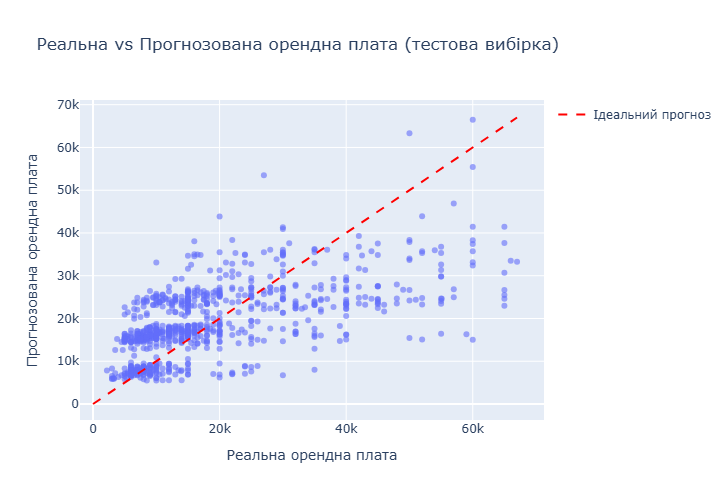

In [64]:
# Візуалізація: реальні vs прогнозовані значення
fig = px.scatter(
    x=y_test,
    y=y_test_pred,
    title='Реальна vs Прогнозована орендна плата (тестова вибірка)',
    labels={'x': 'Реальна орендна плата', 'y': 'Прогнозована орендна плата'},
    opacity=0.6
)

# Додаємо ідеальну лінію (де прогноз = реальність)
max_val = max(y_test.max(), y_test_pred.max())
fig.add_trace(
    go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        name='Ідеальний прогноз',
        line=dict(color='red', dash='dash')
    )
)

fig.update_layout(height=500)
fig.show()

In [ ]:
У нас модель і переоцінює розмір орендної плати і недооцінює. Розкид точок суттєвий. Модель не є точною.

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

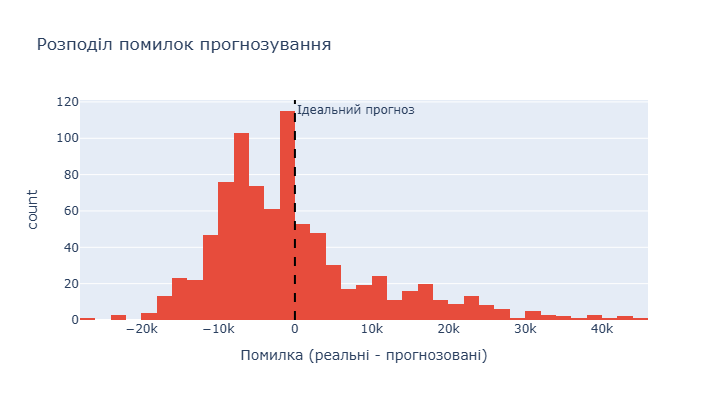

In [65]:
# Розраховуємо помилки (залишки)
residuals = y_test - y_test_pred

# Гістограма помилок
fig = px.histogram(
    x=residuals,
    nbins=50,
    title='Розподіл помилок прогнозування',
    labels={'x': 'Помилка (реальні - прогнозовані)', 'count': 'Кількість'},
    color_discrete_sequence=['#e74c3c']
)
fig.add_vline(x=0, line_dash="dash", line_color="black", annotation_text="Ідеальний прогноз")
fig.update_layout(height=400)
fig.show()

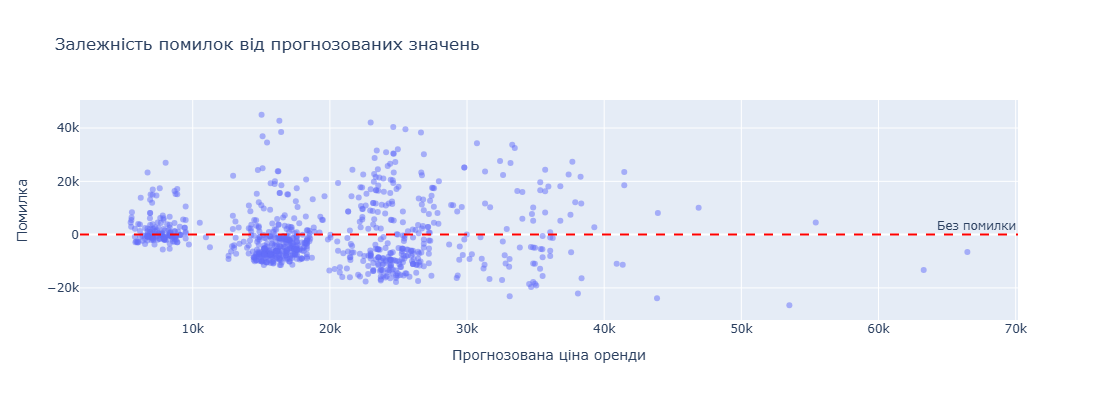

In [86]:
# Scatter plot: помилки vs прогнозовані значення
fig = px.scatter(
    x=y_test_pred,
    y=residuals,
    title='Залежність помилок від прогнозованих значень',
    labels={'x': 'Прогнозована ціна оренди', 'y': 'Помилка'},
    opacity=0.5
)

# Додаємо горизонтальну лінію на 0
fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Без помилки")

fig.update_layout(height=400)
fig.show()

In [66]:
# Знаходимо житло з найбільшими помилками
errors_df = pd.DataFrame({
    'real': y_test.values,
    'predicted': y_test_pred,
    'error': np.abs(residuals)
})

# Топ-5 найбільших помилок
top_errors = errors_df.nlargest(5, 'error')
print("Житло з найбільшими помилками прогнозування:")
print(top_errors)

Житло з найбільшими помилками прогнозування:
      real     predicted         error
809  60000  15020.641383  44979.358617
954  59000  16318.069208  42681.930792
978  65000  22974.052718  42025.947282
570  65000  24622.204074  40377.795926
962  65000  25508.242471  39491.757529


In [71]:
errors_df

,real,predicted,error
1998,22000,32812.071928,10812.071928
3190,5000,6524.342295,1524.342295
2670,37000,36064.391597,935.608403
4647,8000,6893.524960,1106.475040
4488,15000,17953.359180,2953.359180
...,...,...,...
1137,36000,22103.904838,13896.095162
80,14500,20595.583853,6095.583853
258,8500,15661.706775,7161.706775
296,10500,23712.418048,13212.418048


In [87]:
cols = ["AreaType_Built Area", "AreaType_Carpet Area", "AreaType_Super Area"]  
df_result = errors_df.join(df_clean[cols], how="left")

In [78]:
df_result

,real,predicted,error,AreaType_Built Area,AreaType_Carpet Area,AreaType_Super Area
1998,22000,32812.071928,10812.071928,False,True,False
3190,5000,6524.342295,1524.342295,False,False,True
2670,37000,36064.391597,935.608403,False,True,False
4647,8000,6893.524960,1106.475040,False,False,True
4488,15000,17953.359180,2953.359180,False,False,True
...,...,...,...,...,...,...
1137,36000,22103.904838,13896.095162,False,True,False
80,14500,20595.583853,6095.583853,False,False,True
258,8500,15661.706775,7161.706775,False,False,True
296,10500,23712.418048,13212.418048,False,True,False


In [83]:
mean_error_BA = df_result.loc[df_result["AreaType_Built Area"], "error"].mean()
mean_error_CA = df_result.loc[df_result["AreaType_Carpet Area"], "error"].mean()
mean_error_SA = df_result.loc[df_result["AreaType_Super Area"], "error"].mean()

In [85]:
print("Середнє значення помилки для типу Area: Built Area\n",mean_error_BA)
print("Середнє значення помилки для типу Area: Carpet Area\n",mean_error_CA)
print("Середнє значення помилки для типу Area: Super Area\n",mean_error_SA)

Середнє значення помилки для типу Area: Built Area
 6721.439002791452
Середнє значення помилки для типу Area: Carpet Area
 11077.300795383573
Середнє значення помилки для типу Area: Super Area
 5886.886254864398


In [ ]:
Розмір помилки значно більше для типу Area: Carpet Area.

In [ ]:
Для покращення моделі скоріше за все я б спробувала якийсь інший алгоритм.